In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection  import train_test_split as tts
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_curve
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('heart failure.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.shape

(299, 13)

In [4]:
df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

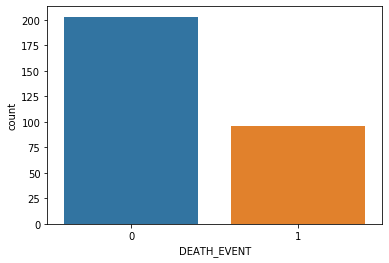

In [5]:
sns.countplot(df.DEATH_EVENT)

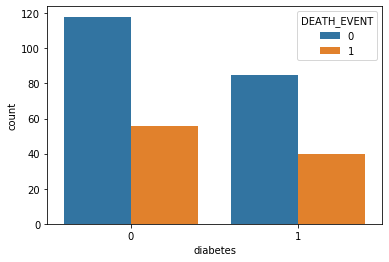

In [6]:
sns.countplot(x='diabetes',hue='DEATH_EVENT',data=df)

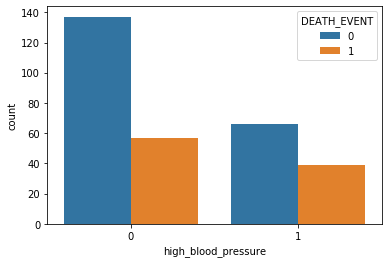

In [7]:
sns.countplot(x='high_blood_pressure',hue='DEATH_EVENT',data=df)

In [8]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


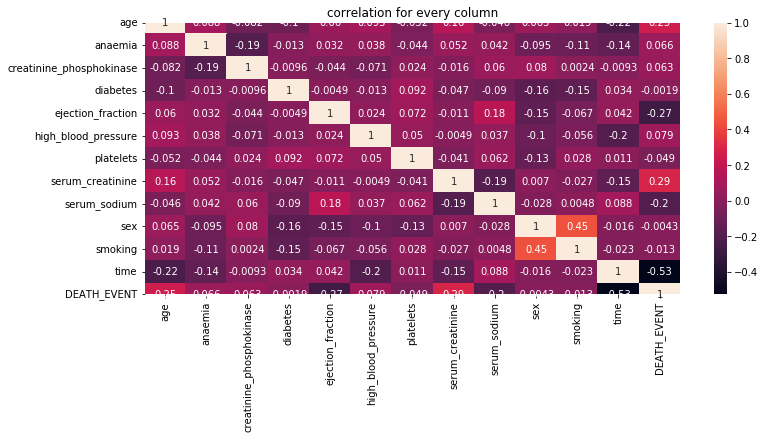

In [9]:
plt.figure(figsize=(12,5))
plt.title('correlation for every column')
sns.heatmap(df.corr(),annot=True)

# Seperate X, Y

In [10]:
x=df.drop('DEATH_EVENT',axis=1)
y=df['DEATH_EVENT']

In [11]:
x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [12]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

# Split the dataset into train and test

In [13]:
xtrain,xtest,ytrain,ytest=tts(x,y,test_size=.30,random_state=1)

In [14]:
xtrain.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
14,49.0,1,80,0,30,1,427000.0,1.0,138,0,0,12
210,70.0,0,212,1,17,1,389000.0,1.0,136,1,1,188
236,75.0,0,119,0,50,1,248000.0,1.1,148,1,0,209
44,60.0,1,588,1,60,0,194000.0,1.1,142,0,0,33
163,50.0,1,2334,1,35,0,75000.0,0.9,142,0,0,126


In [15]:
xtrain.shape

(209, 12)

In [16]:
xtest.shape

(90, 12)

In [17]:
clf=DecisionTreeClassifier()

In [18]:
clf.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

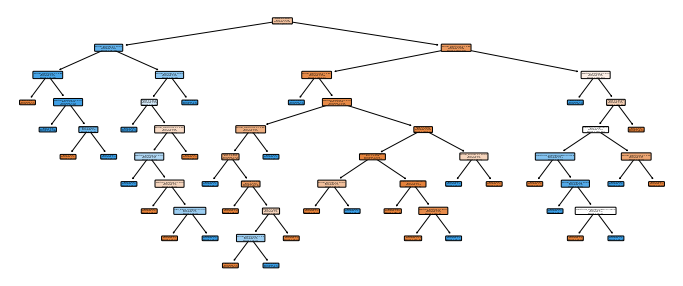

In [19]:
from sklearn import tree
plt.figure(figsize=(12,5))
tree.plot_tree(clf,filled=True,rounded=True,feature_names=x.columns)
plt.savefig('tree2.png',dpi=1200)

In [20]:
pred=clf.predict(xtest)

In [21]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1], dtype=int64)

In [22]:
np.array(ytest)

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1], dtype=int64)

# Confusion Matrix

In [23]:
classification_report(ytest,pred)

'              precision    recall  f1-score   support\n\n           0       0.85      0.86      0.85        64\n           1       0.64      0.62      0.63        26\n\n    accuracy                           0.79        90\n   macro avg       0.74      0.74      0.74        90\nweighted avg       0.79      0.79      0.79        90\n'

In [24]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85        64
           1       0.64      0.62      0.63        26

    accuracy                           0.79        90
   macro avg       0.74      0.74      0.74        90
weighted avg       0.79      0.79      0.79        90



In [25]:
cm=confusion_matrix(ytest,pred)

In [26]:
cm

array([[55,  9],
       [10, 16]], dtype=int64)

Text(0.5, 1, 'confusion  matrix')

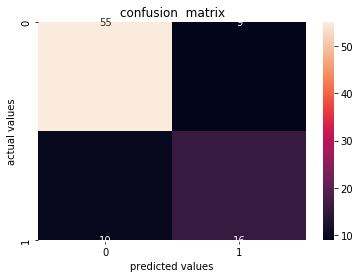

In [27]:
sns.heatmap(cm,annot=True)
plt.xlabel('predicted values')
plt.ylabel('actual values')
plt.title('confusion  matrix')

In [28]:
tp,fn,fp,tn=confusion_matrix(ytest,pred).reshape(-1)

In [29]:
tp

55

In [30]:
fn

9

In [31]:
fp

10

In [32]:
tn

16

# AUC

In [34]:
from sklearn.metrics import plot_roc_curve

ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (D:\anaconda\lib\site-packages\sklearn\metrics\__init__.py)

In [35]:
from scikitplot.metrics import plot_roc_curve

In [36]:
from sklearn.metrics import roc_curve

In [37]:
plot_roc_curve(clf, xtest, ytest)
plt.plot([0,1],[0,1])

TypeError: len() of unsized object

In [38]:
accuracy_score(ytest, pred)

0.7888888888888889

In [39]:
clf.score(xtest,ytest)

0.7888888888888889

In [40]:
(tp+tn)/(tp+tn+fp+fn)

0.7888888888888889

# precision or positive predictive vaule (ppv)

In [42]:
precision=tp/(tp+fp)
precision

0.8461538461538461

# sensivity or recall/hit rate or true positive rate(TPR)

In [44]:
TPR=tp/(tp+fn)
TPR

0.859375

# False positive rate or 1-specificity

In [46]:
FPR=fp/(fp+tn)
FPR

0.38461538461538464

# F1 Measure

In [50]:
(precision+TPR)/2

0.8527644230769231

# Harmonic mean F1 score

In [51]:
F1=(2*precision*TPR)/(precision+TPR)
F1

0.8527131782945736

# True Negative Rate

In [52]:
TNR=tn/(tn+fp)
TNR

0.6153846153846154

# Threat score or Critical Success Index(CSI)

In [53]:
CSI=tp/(tp+fp+fn)
CSI

0.7432432432432432

# False Discovery Rate

In [54]:
FDR=fp/(tp+fp)
FDR

0.15384615384615385